In [20]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing. image import ImageDataGenerator

In [21]:
# Load the dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = path_to_zip.replace('cats_and_dogs.zip', '')

In [22]:
train_dir = PATH + 'cats_and_dogs_filtered/train'
validation_dir = PATH + 'cats_and_dogs_filtered/validation'

Step 2: Preprocess the Data
Use ImageDataGenerator to rescale the images and set up data generators for training and validation.

In [23]:
# Rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Step 3: Build the Model
Create a CNN model using Keras.

In [24]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Step 4: Compile the Model
Set up the loss function, optimizer, and metrics.

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


Step 5: Train the Model
Train the model using the training and validation data generators.

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 images / batch size of 20
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50  # 1000 images / batch size of 20
)

Epoch 1/15
100/100 [==============================] - 103s 998ms/step - loss: 0.6944 - accuracy: 0.5155 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 97s 969ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6889 - val_accuracy: 0.5770
Epoch 3/15
100/100 [==============================] - 107s 1s/step - loss: 0.6892 - accuracy: 0.5445 - val_loss: 0.6928 - val_accuracy: 0.5030
Epoch 4/15
100/100 [==============================] - 98s 983ms/step - loss: 0.6796 - accuracy: 0.5615 - val_loss: 0.6588 - val_accuracy: 0.6310
Epoch 5/15
100/100 [==============================] - 99s 986ms/step - loss: 0.6380 - accuracy: 0.6445 - val_loss: 0.6376 - val_accuracy: 0.6230
Epoch 6/15
100/100 [==============================] - 97s 968ms/step - loss: 0.5976 - accuracy: 0.6830 - val_loss: 0.6080 - val_accuracy: 0.6840
Epoch 7/15
100/100 [==============================] - 68s 679ms/step - loss: 0.5341 - accuracy: 0.7330 - val_loss: 0.6107 - val_acc

Step 6: Evaluate the Model
Evaluate the model's performance on the validation set.

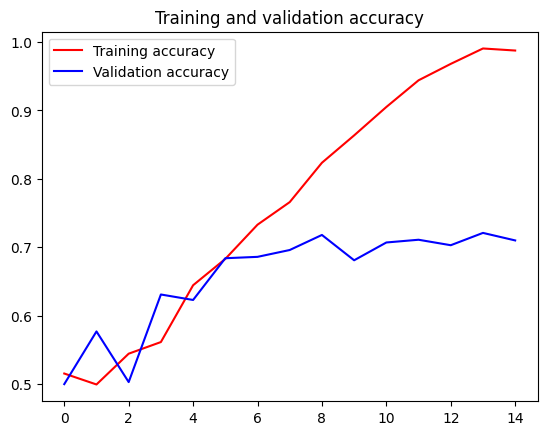

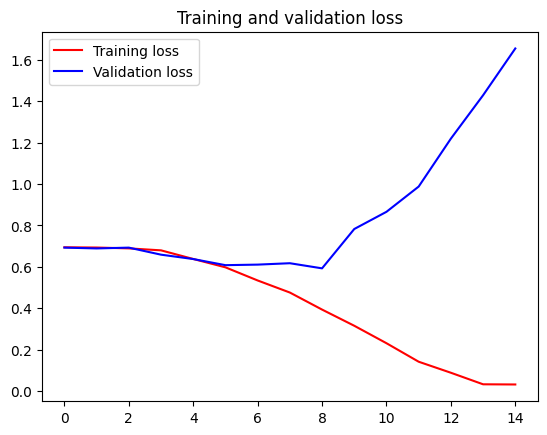

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Step 7: Save the Model
Save the trained model for future use.

In [28]:
model.save('cats_and_dogs_classifier.h5')

/home/ashey/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Step 8: Load and Use the Model
Load the saved model and use it for prediction.

In [29]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model('cats_and_dogs_classifier.h5')

# Load and preprocess the image
img_path = 'cat.10.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Predict
prediction = model.predict(img_tensor)
print(f'Prediction: {"Dog" if prediction[0][0] > 0.5 else "Cat"}')



1/1 [==============================] - 0s 79ms/step
Prediction: Cat


In [30]:
print(prediction)

[[0.00963549]]
